In [48]:
import numpy as np
import matplotlib.pyplot as plt
import timeit


In [49]:
def generate_ICs(N):
    """Generates random initial positions and velocities for N bodies"""
    
    X0 = []
    V0 = []
    while len(X0)<N:
        x = np.random.uniform(-1,1,size=3)
        if np.linalg.norm(x)<=1:
            X0.append(x)
        
    while len(V0)<N:
        x = np.random.uniform(-0.1,0.1,size=3)
        if np.linalg.norm(x)<=0.1:
            V0.append(x)
        
    X0 = np.array(X0)
    V0 = np.array(V0)

    return X0, V0

In [50]:
# leap frog N body algorithm

def leapfrogN(M, X0, V0, Nt, dt, acc):
    """M: array with mass values; X0 & V0: Nx3 arrays with initial
    conditions of positions and velocities; Nt: number of time steps; dt: 
    time step size; acc: function that evaluates and gives back Nx3 array
    with accelerations for given positions and masses"""
    N = np.shape(M)[0]
    t = np.arange(0,dt*Nt,dt)
    X = np.zeros((N,3,Nt))
    V = np.zeros((N,3,Nt))
    
    X[:,:,0] = X0
    V[:,:,0] = V0
    
    for i in range(Nt-1):
        if i%100==0:
            print(i)
        vhalf = V[:,:,i] + acc(M,X[:,:,i])*dt/2
        X[:,:,i+1] = X[:,:,i] + vhalf*dt
        V[:,:,i+1] = vhalf + acc(M,X[:,:,i+1])*dt/2
    
    return t, X, V
    
    

In [51]:
# RHS of dv/dt aka acceleration
def newton_acc(M,X):
    
    N = np.shape(M)[0]
    A = np.zeros((N,3))
    
    for i in range(N):
        for j in range(N):
            if i==j:
                continue
            A[i,:] += M[j]*(X[j,:] - X[i,:])/(np.linalg.norm(X[j,:] - X[i,:]))**3
    
    return A

In [52]:
def calculate_energy(M,X,V):
    
    E = 0
    for i in range(len(M)):
        E += M[i]*np.linalg.norm(V[i,:])**2/2
        for j in range(i+1, len(M)):
            E += -M[i]*M[j]/np.linalg.norm(X[i,:]-X[j,:])
    
    return E

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
Simulation time = 32.56033466000008 seconds


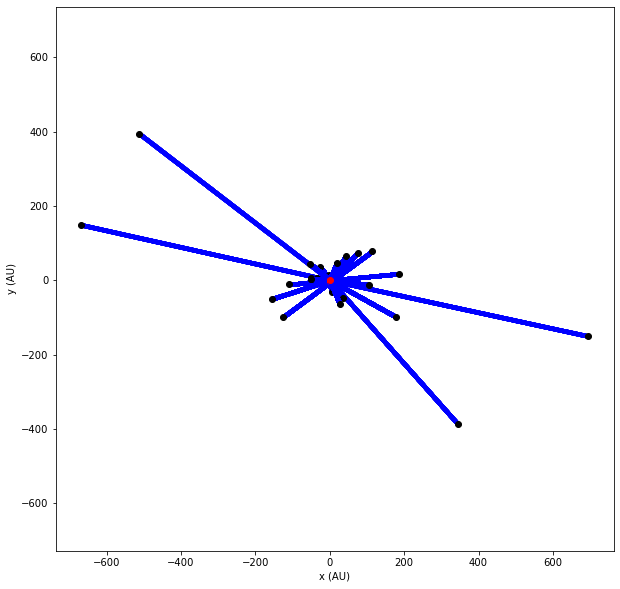

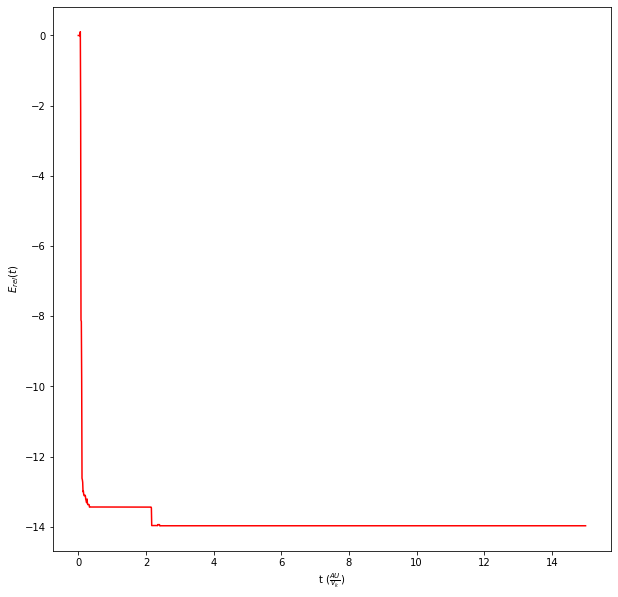

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
Simulation time = 33.028148838999186 seconds


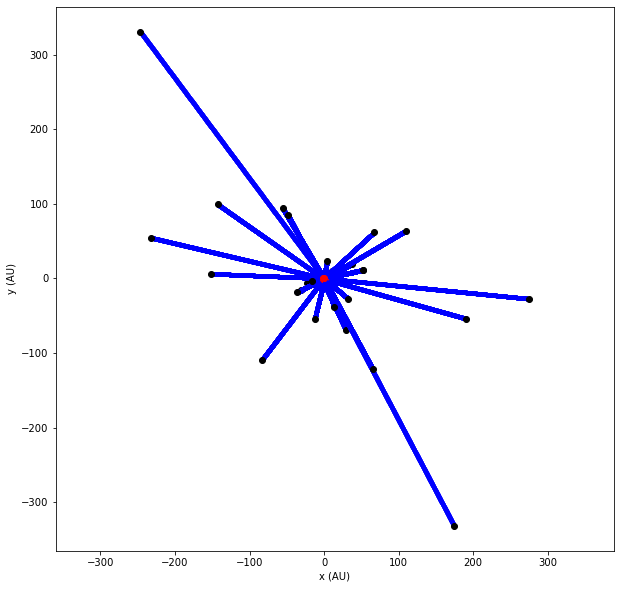

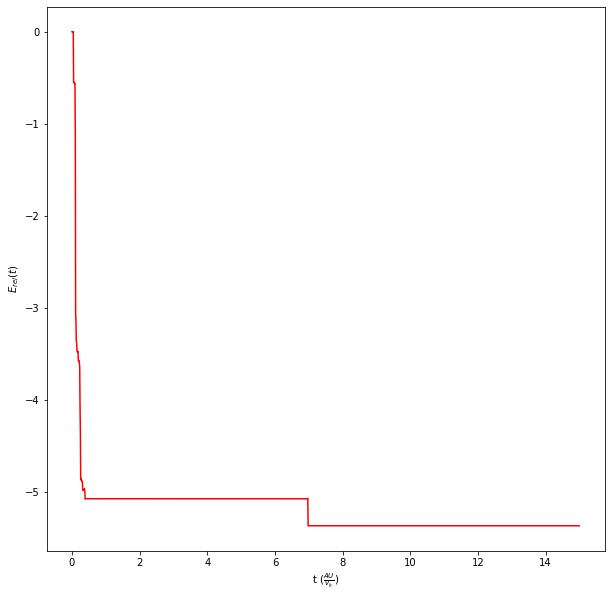

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
Simulation time = 32.945260692000375 seconds


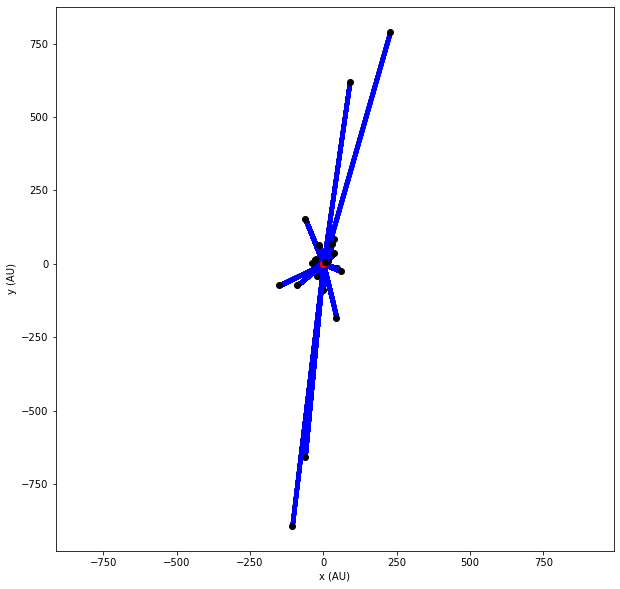

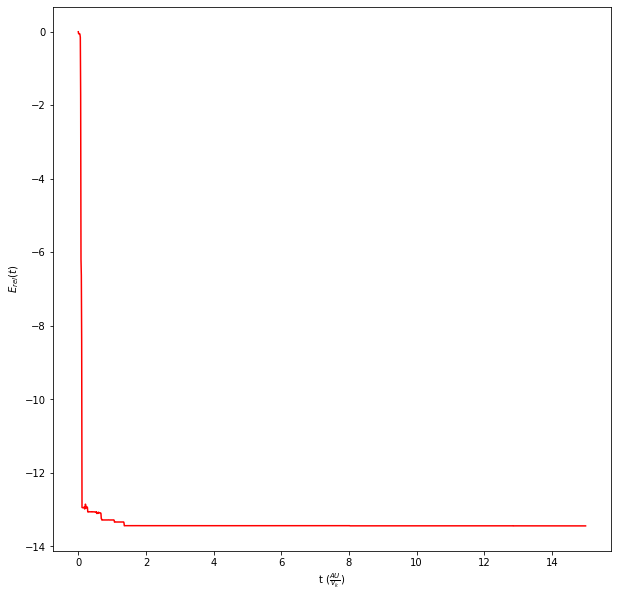

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
Simulation time = 32.90746646200023 seconds


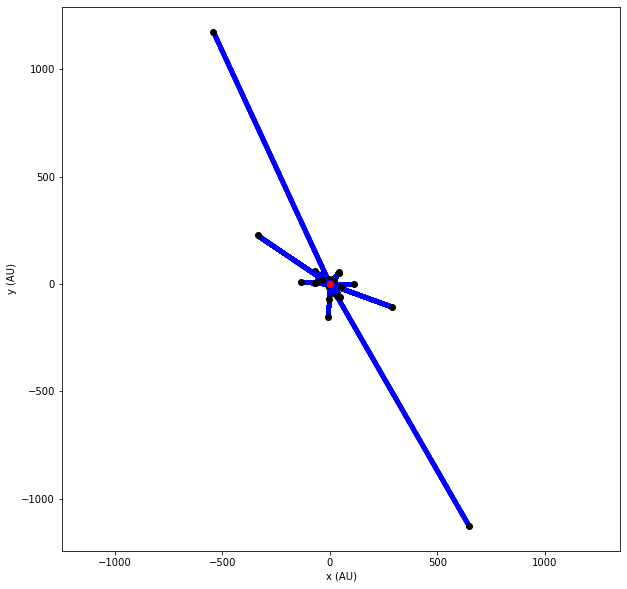

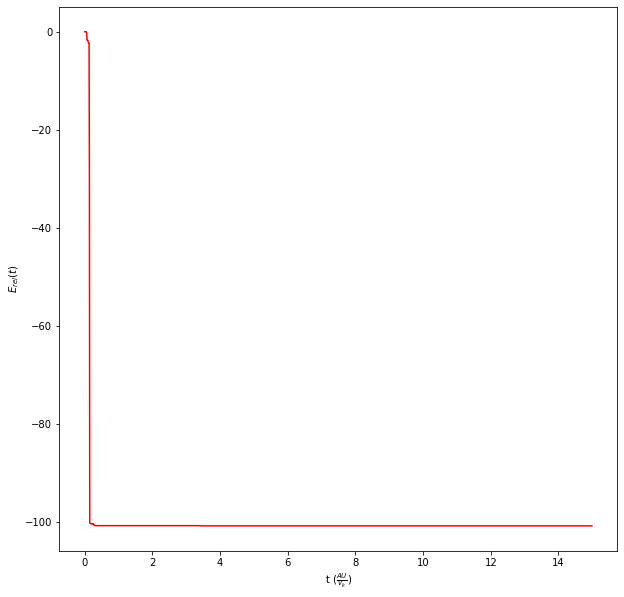

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
Simulation time = 33.65199933299846 seconds


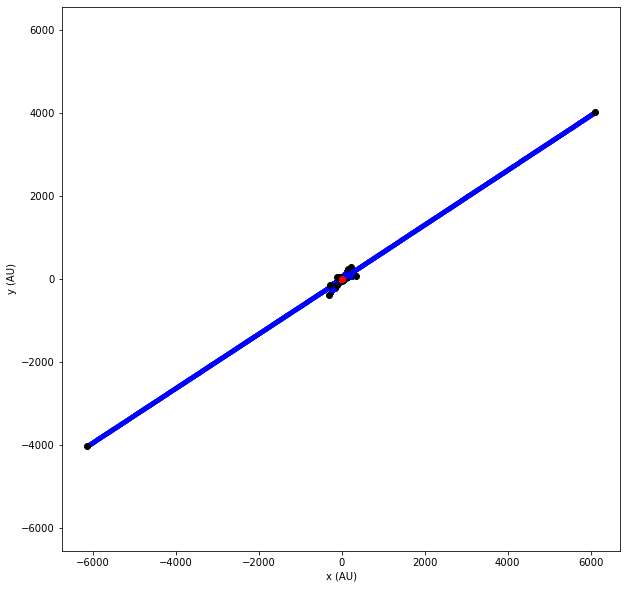

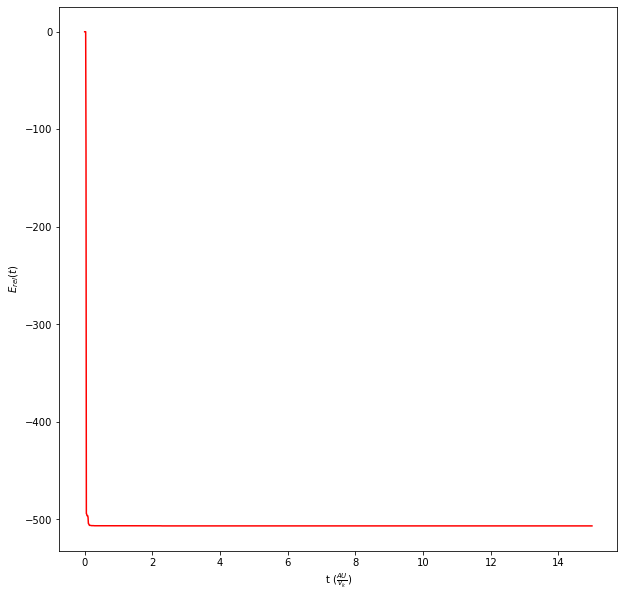

In [19]:
# 3.1 N = 30 stars

N = 30 # Number of stars
p = 1 # Mass of stars

dt = 1e-2
T = 15
Nt = int(T/dt)

for i in range(5):
    
    X0, V0 = generate_ICs(N)
    M = np.ones(N)*p

    start = timeit.default_timer()
    t, X, V = leapfrogN(M, X0, V0, Nt, dt, newton_acc)
    stop = timeit.default_timer()

    print(f'Simulation time = {stop - start} seconds')

    fig = plt.figure(figsize=(10,10))
    for i in range(N):
        plt.plot(X[i,0,:],X[i,1,:], 'b.')
        plt.plot(X[i,0,0],X[i,1,0],'ro')
        plt.plot(X[i,0,-1],X[i,1,-1],'ko')
    #plt.legend(['Star 1','Star 2'], loc='upper left')
    plt.xlabel('x (AU)'); plt.ylabel('y (AU)')
    plt.axis('equal')
    plt.show()

    E_rel = []
    for i in range(Nt):
        E_rel.append((calculate_energy(M,X[:,:,i],V[:,:,i])-calculate_energy(M,X0,V0))/calculate_energy(M,X0,V0))
                 

    fig1 = plt.figure(figsize=(10,10))
    plt.plot(t,E_rel,'r-')
    plt.xlabel(r't ($\frac{AU}{v_k}$)')
    plt.ylabel(r'$E_{rel}(t)$')
    plt.show()

In [22]:
# 3.2 N = 300 stars

N = 300 # Number of stars
p = 0.1 # Mass of stars

X0, V0 = generate_ICs(N)
M = np.ones(N)*p

dt = 1e-2
T = 15
Nt = int(T/dt)

start = timeit.default_timer()
t, X, V = leapfrogN(M, X0, V0, Nt, dt, newton_acc)
stop = timeit.default_timer()

print(f'Simulation time = {stop - start} seconds')

fig = plt.figure(figsize=(10,10))
for i in range(N):
    plt.plot(X[i,0,:],X[i,1,:], 'b.')
    plt.plot(X[i,0,0],X[i,1,0],'ro')
    plt.plot(X[i,0,-1],X[i,1,-1],'ko')
#plt.legend(['Star 1','Star 2'], loc='upper left')
plt.xlabel('x (AU)'); plt.ylabel('y (AU)')
plt.axis('equal')
plt.show()

E_rel = []
for i in range(Nt):
    E_rel.append((calculate_energy(M,X[:,:,i],V[:,:,i])-calculate_energy(M,X0,V0))/calculate_energy(M,X0,V0))
                 

fig1 = plt.figure(figsize=(10,10))
plt.plot(t,E_rel,'r-')
plt.xlabel(r't ($\frac{AU}{v_k}$)')
plt.ylabel(r'$E_{rel}(t)$')
plt.show()

0


KeyboardInterrupt: 

In [53]:
# close encounter checker:

def leapfrogN_close_encounter(M, X0, V0, Nt, dt, acc, enc_lim):
    """M: array with mass values; X0 & V0: Nx3 arrays with initial
    conditions of positions and velocities; Nt: number of time steps; dt: 
    time step size; acc: function that evaluates and gives back Nx3 array
    with accelerations for given positions and masses"""
    N = np.shape(M)[0]
    t = np.arange(0,dt*Nt,dt)
    X = np.zeros((N,3,Nt))
    V = np.zeros((N,3,Nt))
    
    X[:,:,0] = X0
    V[:,:,0] = V0
    
    for i in range(Nt-1):
        for j in range(N):
            for k in range(j+1,N):
                if np.linalg.norm(X[j,:,i] - X[k,:,i]) < enc_lim:
                    dt /= 2 # how much smaller shall dt be made?
                    print(dt)
                    #Nt = int((T-2*dt*Nt)/dt)
                    Nt = int(T/dt)
                    break
        if i%100==0:
            print(i)
        vhalf = V[:,:,i] + acc(M,X[:,:,i])*dt/2
        X[:,:,i+1] = X[:,:,i] + vhalf*dt
        V[:,:,i+1] = vhalf + acc(M,X[:,:,i+1])*dt/2
    
    return dt, t, X, V
    



0
0.005
0.0025
0.00125
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
Time step at the end: 0.00125
Simulation time = 37.67665568300072 seconds


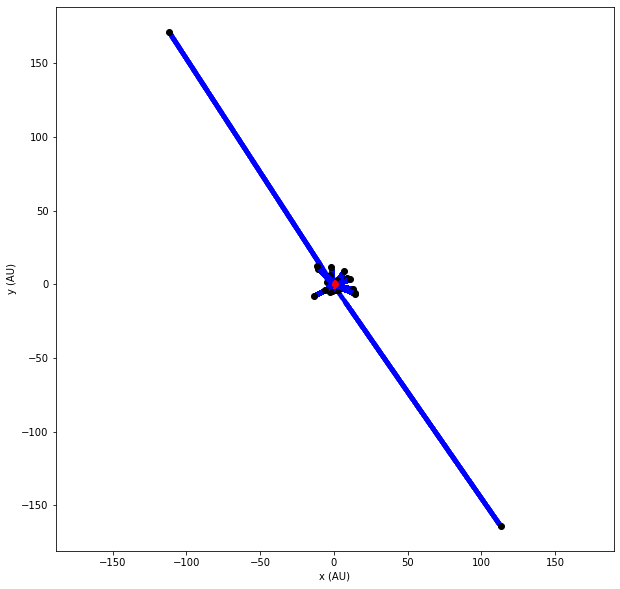

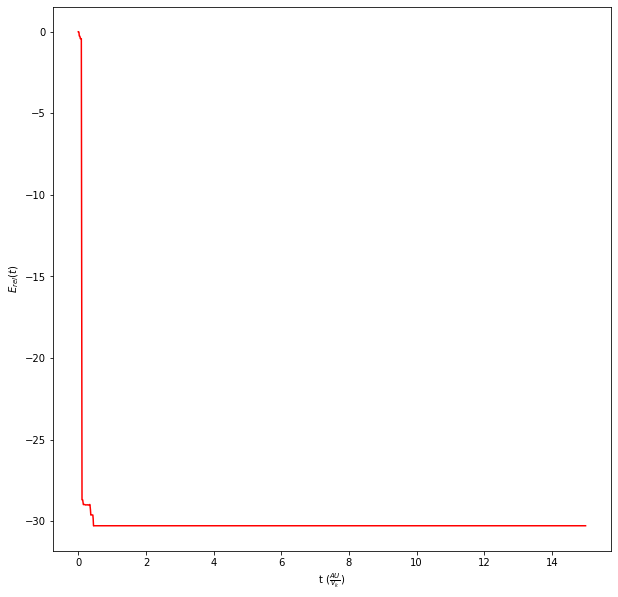

In [58]:
N = 30 # Number of stars
p = 1 # Mass of stars

X0, V0 = generate_ICs(N)
M = np.ones(N)*p
enc_lim = 2*1e-2 # distance between two stars that triggers "close encounter checker"
                # what makes sense here?

dt = 1e-2
T = 15
Nt = int(T/dt)

start = timeit.default_timer()
dt, t, X, V = leapfrogN_close_encounter(M, X0, V0, Nt, dt, newton_acc, enc_lim)
stop = timeit.default_timer()

print(f'Time step at the end: {dt}')
print(f'Simulation time = {stop - start} seconds')

fig = plt.figure(figsize=(10,10))
for i in range(N):
    plt.plot(X[i,0,:],X[i,1,:], 'b.')
    plt.plot(X[i,0,0],X[i,1,0],'ro')
    plt.plot(X[i,0,-1],X[i,1,-1],'ko')

plt.xlabel('x (AU)'); plt.ylabel('y (AU)')
plt.axis('equal')
plt.show()

E_rel = []
for i in range(Nt):
    E_rel.append((calculate_energy(M,X[:,:,i],V[:,:,i])-calculate_energy(M,X0,V0))/calculate_energy(M,X0,V0))
                
fig1 = plt.figure(figsize=(10,10))
plt.plot(t,E_rel,'r-')
plt.xlabel(r't ($\frac{AU}{v_k}$)')
plt.ylabel(r'$E_{rel}(t)$')
plt.show()